In [2]:
#Se importan las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Se inicializa una poblacion de cromosomas para encontrar ruta mas corta

def generarCromosoma(numeroCiudades):
    #Por medio de esta funcion se genera un cromosoma donde recorra todas las ciudades sin ningun orden especifico de forma aleatoria
    cromosoma = np.random.choice(numeroCiudades, numeroCiudades, replace=False)
    return cromosoma

def generarPoblacion(numeroCromosomas, numeroCiudades):
    #Funcion genera numero de cromosomas de una poblacion que recorrec un numero de ciudades definida como parametro
    resultado = []
    for cromContador in range(numeroCromosomas):
        resultado += [generarCromosoma(numeroCiudades)]
    resultado = np.array(resultado)
    return resultado



In [4]:
def calculoCordenadas(numeroCiudad):
    '''
    :param numeroCiudad: numero de la ciudad
    :return: cordenadas de localizacion
    '''
    cordenadaX = 0.1 * ((9+13 * numeroCiudad**2) % 200 )
    cordenadaY = 0.1 * ((7 + 1327 * numeroCiudad) % 200)
    resultado = [cordenadaX, cordenadaY]
    return resultado

#Para simplificar la computacion del programa calcularemos las cordenadas para cada ciudad de antemano
def cordenadasGlobales(numeroCiudades):
    #Esta funcion genera un arreglo con las cordenadas para cada ciudad
    conjuntoCordenadas = []
    for ciudad in range(numeroCiudades):
        conjuntoCordenadas += [calculoCordenadas(ciudad)]
    return conjuntoCordenadas

#Guardamos en una variable local las cordenadas
cordenadasCiudades = cordenadasGlobales(100)

#Generamos la funcion de ajuste para evaluar el programa
def funcionAjuste(cromosoma):
    distanciaEuclidiana = 0
    contador = 0
    cord1 = []
    cord2 = []
    for ciudad in cromosoma-1:
        #Se utiliza el siguiente condicional para definir la lista del cromosoma como una trayectoria cerrada
        if contador == cromosoma.size-1:
            cord2 = cordenadasCiudades[cromosoma[0]]
        else:
            cord2 = cordenadasCiudades[cromosoma[contador+1]]
        cord1 = cordenadasCiudades[cromosoma[contador]]
        distanciaEuclidiana += euclidiana(cord1, cord2)
        contador += 1
    ajuste = 1/distanciaEuclidiana
    return ajuste

def euclidiana(cord1, cord2):
    #Esta funcion calcula la distancia euclidiana entre dos cordenadas
    x1 = cord1[0]
    x2 = cord2[0]
    y1 = cord1[1]
    y2 = cord2[1]
    distancia = ((x1 - x2)**2 + (y1 - y2)**2)**(1/2)
    return distancia



funcionAjuste(generarCromosoma(100))


0.0009414901305490532

In [5]:
#Programamos un operador de mutacion que se le aplicara a todos los cromosomas con una probabilidad p
def operadorMutación(cromosoma, p_mut):
    """
    Escriba una función que realice la mutación de un cromosoma con probabilidad p_mut
    """
    cromosomaMutado = np.copy(cromosoma)
    r = np.random.random()
    #Escogen dos valores aleatorios no repetidos
    valoresIntercambiar = np.random.choice(cromosoma, 2, replace=False)

    if r < p_mut:
        cromosomaMutado[valoresIntercambiar[0]] = cromosoma[valoresIntercambiar[1]]
        cromosomaMutado[valoresIntercambiar[1]] = cromosoma[valoresIntercambiar[0]]

    return cromosomaMutado



0.0010095441095045671
[35 56 50  8 71 31 89 78 79 43 61 12  6 24 87 13 37 62 99 59 26 17 81 68
 83 67  1 14 84 57 11 10 64 33 88 69 77 29 86  0 65  3 21 93 66 98 15 27
 38 74 25 82 45 55 85 47 42 97 46 95  9 40 60 32 54  4 91 39 70 58 72 18
  7 73 53 75 76  5 96 16 94 34  2 63 92 28 44 36 52 41 19 80 20 30 51 49
 22 48 90 23]


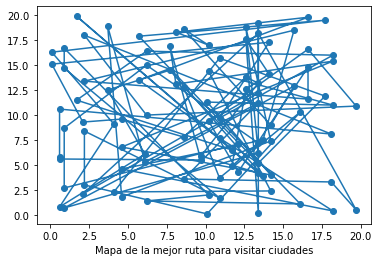

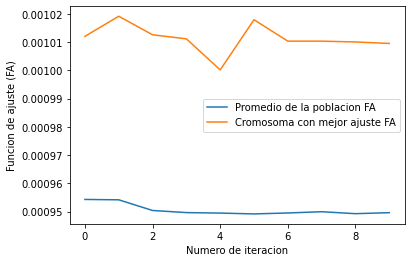

In [15]:
def buscarRutaMasCorta1():
    #Esta funcion genera las graficas solicitadas tras aplicar la primera parte del algoritmo
    global cordenadasCiudades
    numeroCiudades = 100
    numeroCromosomas = 50
    promedios = []
    mejores = []
    cordenadasCiudades = cordenadasGlobales(numeroCiudades)
    poblacion = generarPoblacion(numeroCromosomas, numeroCiudades)
    #Se realizan 10 generaciones de mutacion
    for i in range(10):
        contador = 0
        for individuo in poblacion:
            #Con una probabilidad de 0.6 se mutan aproximadamente 6 veces cada cromososma
            poblacion[contador] = operadorMutación(individuo, 0.6)
            contador += 1
        promedios += [valoresPromedio(poblacion)]
        mejorRuta, mejoreAjuste = seleccionadorMejor(poblacion)
        mejores += [mejoreAjuste]
    mejorRuta, mejorAjuste = seleccionadorMejor(poblacion)
    fig, ax = plt.subplots()
    fig2, ax2 = plt.subplots()
    arregloAGraficar = definirArregloGrafica(mejorRuta)
    #Imprime valores
    print(mejorAjuste)
    print(mejorRuta)
    arregloAGraficar = np.array(arregloAGraficar)
    traspuesto = separarComponentes(arregloAGraficar)
    ax.plot(traspuesto[0], traspuesto[1])
    ax.scatter(traspuesto[0], traspuesto[1])
    ax2.plot(promedios, label = 'Promedio de la poblacion FA')
    ax2.plot(mejores, label = 'Cromosoma con mejor ajuste FA')
    ax.set_xlabel('Mapa de la mejor ruta para visitar ciudades')
    ax2.set_xlabel('Numero de iteracion')
    ax2.set_ylabel('Funcion de ajuste (FA)')
    plt.legend()
    plt.show()


def valoresPromedio(poblacion):
    '''

    :param poblacion: un conjunto de cromosomas
    :return: promedio de los valores de ajuste
    '''
    ajustes = []
    pobCopia = np.copy(np.array(poblacion))
    for individuo in pobCopia:
        ajustes += [funcionAjuste(individuo)]
    ajustes = np.array(ajustes)
    promedio = np.average(ajustes)
    return promedio

def definirArregloGrafica(orden):
    #Funcion separa grafica en componentes para poder ser graficadas en un mapeo
    global cordenadasCiudades
    cords = cordenadasCiudades
    arreglo = []
    for elemento in orden:
        arreglo += [cords[elemento]]
    arreglo += [cords[orden[0]]]
    return arreglo

def separarComponentes(arreglo):
    #Funcion auxiliar ayuda a generar los arreglos para mapear de forma adecuada la ruta
    compX = []
    compY = []
    for elemento in arreglo:
        compX += [elemento[0]]
        compY += [elemento[1]]
    resultado = [compX] + [compY]
    resultado = np.array(resultado)
    return resultado


def seleccionadorMejor(poblacion):
    '''

    :param poblacion: poblacion de cromosomas
    :return: selecciona al mejor cromosoma con funcion de ajuste mas alto
    '''
    ajustes = []
    for individuo in poblacion:
        ajustes += [funcionAjuste(individuo)]
    mejorAjuste = np.amax(ajustes)
    mejorRuta = poblacion[np.argmax(ajustes)]
    return mejorRuta, mejorAjuste


buscarRutaMasCorta1()

0.004966522285957068
[50 50 69 77 88  6 91  9 64 34  1 20 72 28 80 99 66 36 94 12 23 78 70 81
 10 32 54 46 68  5 16 79 35 65 95 84 21 29 48 67 56 89 26 62 38 11 74 52
 71 85 30 19 90 24 76 73  2 98 57 43 92  7 59 18 51 40 37  4 13 87 60 49
 82 63  8 93 41 27 22 15 45 97 75 53 42 86 83 61 39 17 14 33 44 58 25 47
  3 55 31 96]


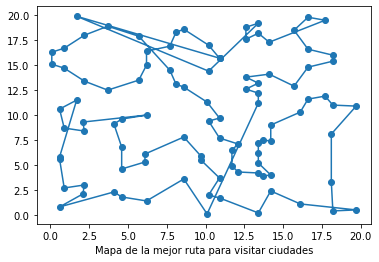

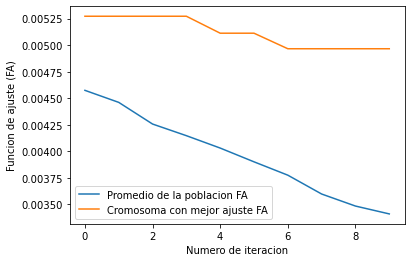

In [17]:
#Segunda parte

def segundaFormaDeCromosoma(nCiudades):
    '''

    :param nCiudades: numero de ciudades en el algoritmo
    :return: genera con el segundo algoritmo una poblacion de cromosomas con una ruta que busca el elemento o ciudad mas cercana
    '''
    cromosoma = []
    ciudadesLista = np.arange(1, nCiudades, 1)
    primerElemento = np.random.randint(1, nCiudades)
    cromosoma += [primerElemento]
    for i in range(nCiudades - 1):
        ciudadesLista, elemento = nodoMasCercano(cromosoma[-1], ciudadesLista)
        cromosoma += [elemento]
    return cromosoma


def nodoMasCercano(nNodo, ciudades ):
    '''

    :param nNodo: numero de ciudad a la que se encuentra el siguiente elemento
    :param ciudades: ciudades disponibles a visitar
    :return: la ciudad mas cercana al nodo indicado del conjunto de ciudades disponible
    '''
    global cordenadasCiudades
    listaRetornar = np.copy(ciudades)
    distancias = []
    for ciudad in ciudades:
        distancias += [euclidiana(cordenadasCiudades[nNodo], cordenadasCiudades[ciudad])]
    distancias = np.array(distancias)
    indiceElemento = np.argmin(distancias)
    listaRetornar = np.delete(listaRetornar, indiceElemento)
    elemento = ciudades[indiceElemento]
    return listaRetornar, elemento



def segundaFormaPoblacion(nCiudades, nCromosomas):
    '''

    :param nCiudades: numero de ciudades
    :param nCromosomas: cantidad de cromosomas en una poblacion
    :return: genera una poblacion con el segundo algoritmo
    '''
    poblacion = []
    for i in range(nCromosomas):
        poblacion += [segundaFormaDeCromosoma(nCiudades)]
    poblacion = np.array(poblacion)
    return poblacion


def buscarRutaMasCorta2():
    #Mismo grafica para la primer parte pero el primer elemento se mantienen igual y muta de 3 a 10 veces cada cromosoma
    #Genera las graficas y mapas indicados para luego un posterior analisis
    global cordenadasCiudades
    promedios = []
    mejores = []

    numeroCiudades = 100
    numeroCromosomas = 50

    cordenadasCiudades = cordenadasGlobales(numeroCiudades)
    poblacion = segundaFormaPoblacion(numeroCiudades, numeroCromosomas)
    for i in range(10):
        contador = 0
        for individuo in poblacion:
            if contador != 0:
                poblacion[contador] = operadorMutación(individuo, 0.3)
            contador += 1
        promedios += [valoresPromedio(poblacion)]
        mejorRuta, mejoreAjuste = seleccionadorMejor(poblacion)
        mejores += [mejoreAjuste]
    mejorRuta, mejorAjuste = seleccionadorMejor(poblacion)
    fig, ax = plt.subplots()
    fig2, ax2 = plt.subplots()
    arregloAGraficar = definirArregloGrafica(mejorRuta)
    print(mejorAjuste)
    print(mejorRuta)
    arregloAGraficar = np.array(arregloAGraficar)
    traspuesto = separarComponentes(arregloAGraficar)
    ax.plot(traspuesto[0], traspuesto[1])
    ax.scatter(traspuesto[0], traspuesto[1])
    ax2.plot(promedios, label = 'Promedio de la poblacion FA')
    ax2.plot(mejores, label = 'Cromosoma con mejor ajuste FA')
    ax.set_xlabel('Mapa de la mejor ruta para visitar ciudades')
    ax2.set_xlabel('Numero de iteracion')
    ax2.set_ylabel('Funcion de ajuste (FA)')
    plt.legend()
    plt.show()

buscarRutaMasCorta2()